# Numerical exercises 05
____________________
From shell, inside _this_ directory:
- To compile: `make`
- To run the program there are several options: more about that in  the `README`. For further explanation see the notes below.
_______________________

In [2]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

## Exercise 05.1: Sampling the first two hydrogen wavefunctions with Metropolis algorithm

### A brief description of the quantum mechanical problem

The system we are studying is a single non-relativistic charged particle in 3D space (an electron), with the dynamics given by the hamiltonian of the hydrogen atom. The state of such a particle is described, in the quantum mechanics framework, by its wavefunction $\Psi_N(\vec r, t)$.

To compute the values of interest, such as the mean radial position in one of the eigenstates of the hamiltonian, we need to sample the associated wavefunctions. The theory gives us their analytical form. In particular, with Bohr units $a_0= 4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$, we obtain for the **ground state** $1s$, with quantum numbers ($n=1$, $m=0$, $l=0$):

$$
\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0},
$$

and for the **first excited state** $2p$, ($n=2$, $m=1$, $l=0$):
$$
\Psi_{2,1,0}(r,\theta,\phi)= \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta).
$$

Being these wavefunctions the eigenstates of the hamiltonian, they are time independent. The expectation values for the radius at any time are:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$


### The sampling method: Metropolis algorithm

The Metropolis algorithm is a Markov Chain Monte Carlo (MCMC) method used to obtain a sequence of random samples from a probability distribution which is itself difficult to sample directly. In our case, we want to obtain the sample of the probabilities $p(\vec x)=|\Psi|^2$ defined above and use it to calculate the integrals for the expectation values. This algorithm's advantage is that it can operate on any function in any number of dimensions.

A stochastic Markov process, with the (ergodic) transition probability from $\vec y$ to $\vec x$ defined as $K(\vec x|\vec y)$, reaches a unique stationary distribution $p(\vec x)$ when the following conditions are met:
- Sufficient **condition of detailed balance** for the existence of the stationary distribution: $p(\vec x)K(\vec x|\vec y)=p(\vec y) K(\vec y | \vec x)$;
- **Ergodicity** of the Markov process for the unicity of the stationary distribution.

One can prove that we can build our Markov chain using: $K(\vec x | \vec y) = A(\vec y | \vec x)  T(\vec y | \vec x)$, where $T$ is the **trial transition probability**, in our code we used a **uniform** and a **gaussian** (with center in $\vec y$) trial transition probability, $A$ is the probability to accept $\vec y$ as the next step after $\vec x$.

In both the uniform and gaussian case, the transition probabilities are symmetric with respect to $\vec x$ and $\vec y$, so that we can define:
$$
q(x|y)=\frac {T(\vec{y}|\vec{x}) p(\vec{x})} {T(\vec{x}|\vec{y}) p(\vec{y})} =
\frac {p(\vec{x})} {p(\vec{y})}, \quad \quad A(\vec{x}|\vec{y}) = \min{\left[1,q(x|y)\right]}
$$
Once sampled the points using these definitions, we obtained the average radial positions by simulating $M=10^7$ steps of the Markov chain, and for each of them calculating the radius $\langle r \rangle$, divided in $N=100$ blocks to obtain averages valued of the radius and uncertainties with the blocking method. 

It is to be noted that the blocking method here is particularly helpful to counterbalance the fact that contiguous steps in a Markov chain are correlated.

### Instructions and practical details about the code

To build the code, the class `hydrogen` was created, with a sampling method `metropolis()` for the distribution function to be sampled (which can be specified in the constructor, and corresponds to the GS or to the I excited state of the hydrogen atom). The sampling uses a transition probability gaussian or uniform, to be specified in the constructor as well. One can select also the starting point and the step of the sampling.

The `main` is implemented in order to easily run the program with different step values, in order to gauge it to obtain a probability of acceptance $A=50\%$. 

For example, to plot the graphs of the average values of the radius with its uncertainty, obtained both with uniform and gaussian trial transition probability, and the 3D scatter plots of the particle's position (starting from the origin), run from terminal:

`./main --pos+rad 1.22 2.94 1.5 3.7`

where the transition probability steps, that give the desired acceptance probability, are:
- for the state $1s$, uniform: $1.22\ a_0$; gaussian $1.5\ a_0$;
- for the state $2p$, uniform: $2.94\ a_0$; gaussian $3.7\ a_0$.

To plot $M=10^4$ radius values obtained through uniform trial transition probability but starting this time far from the origin, in $(100, 100, 100)$, run from terminal:

`./main --far 1.22 2.94 1.5 3.7`

### Notes about the results

By choosing the origin as the starting point, it is not necessary to equilibrate the system: the start of the random walk is already near the most probable regions of the distributions we are interested in obtaining the samples of. Formally, very soon in our simulation, that is, for a low value of $i$, we obtain that the probability distribution $d_{i+1}(\vec x)$, associated to the $i+1$ step of the random walk, coincides with the desired probability distribution $p(\vec x)$:
$$
d_{i+1}(\vec{x}) = \int K(\vec{x}|\vec{y}) d_i(\vec{y}) = p(\vec{x}) = \lim_{n \to \infty} d_n(\vec{x})
$$

The first two graphs show that the two different trial transition probabilities are equivalent and both compatible with the theoretical results. The scatter plots above them show the usual shapes of the _orbitals_ for the hydrogen atoms. 

Finally, the last plot shows the radically different behavior that can be seen when starting our walk far from the origin. More comment on that above the last graph.

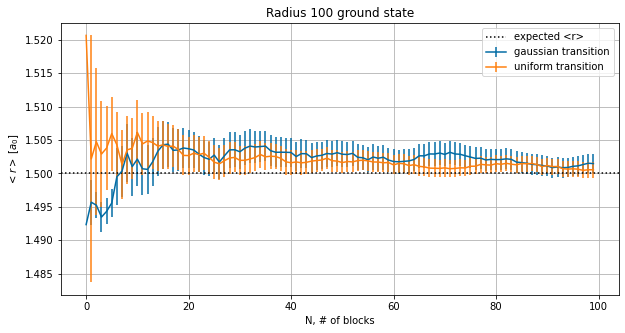

Gaussian transition | Error on the last block:  0.00143154
Uniform transition | Error on the last block:  0.00115526


In [8]:
r_gaus, er_gaus = np.loadtxt("radius100gauss.dat", delimiter=" ", unpack=True)
r_unif, er_unif = np.loadtxt("radius100uniform.dat", delimiter=" ", unpack=True)

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(r_gaus.size),r_gaus,yerr=er_gaus, label='gaussian transition')
plt.errorbar(np.arange(r_unif.size),r_unif,yerr=er_unif, label='uniform transition')
plt.axhline(1.5, 0, 100, linestyle='dotted', color='black',linewidth=1.5,label='expected <r>')
plt.legend()
plt.grid(True)
plt.xlabel("N, # of blocks")
plt.ylabel("$<r>\ [a_0]$" )
plt.title ("Radius 100 ground state")
plt.show()

print("Gaussian transition | Error on the last block: ", er_gaus[-1])
print("Uniform transition | Error on the last block: ", er_unif[-1])

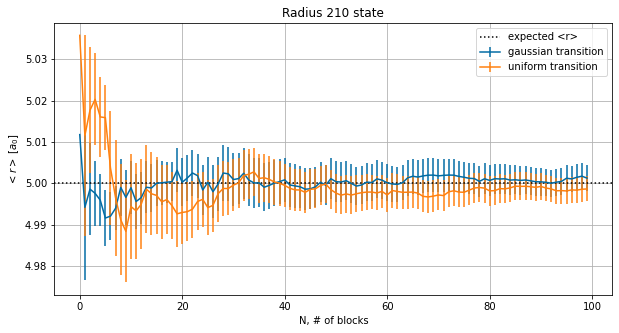

Gaussian transition | Error on the last block:  0.00321004
Uniform transition | Error on the last block:  0.00301934


In [9]:
r_gaus, er_gaus = np.loadtxt("radius210gauss.dat", delimiter=" ", unpack=True)
r_unif, er_unif = np.loadtxt("radius210uniform.dat", delimiter=" ", unpack=True)

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(r_gaus.size),r_gaus,yerr=er_gaus, label='gaussian transition')
plt.errorbar(np.arange(r_unif.size),r_unif,yerr=er_unif, label='uniform transition')
plt.axhline(5, 0, 100, linestyle='dotted', color='black',linewidth=1.5,label='expected <r>')
plt.legend()
plt.grid(True)
plt.xlabel("N, # of blocks")
plt.ylabel('$<r>\ [a_0]$' )
plt.title ("Radius 210 state")
plt.show()

print("Gaussian transition | Error on the last block: ", er_gaus[-1])
print("Uniform transition | Error on the last block: ", er_unif[-1])

In [5]:
title=('Ground State','$2p$ State')

def fig3D(if_far,state):   #state is "GS" or "210"
    if if_far: state+="_far"
    pos=np.genfromtxt(state+'.dat',delimiter=' ',names='x,y,z')

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(pos['x'], pos['y'], pos['z'], c=pos['z'], marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(1, 30)
    if (state=="GS") or (state=="GS_far"): plt.title(title[0])
    elif (state=="210") or (state=="210_far"): plt.title(title[1])
    plt.show()

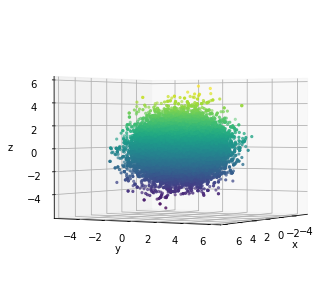

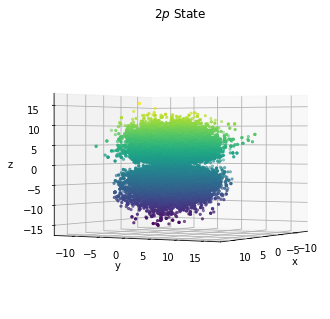

In [6]:
fig3D(False,"100")
fig3D(False,"210")

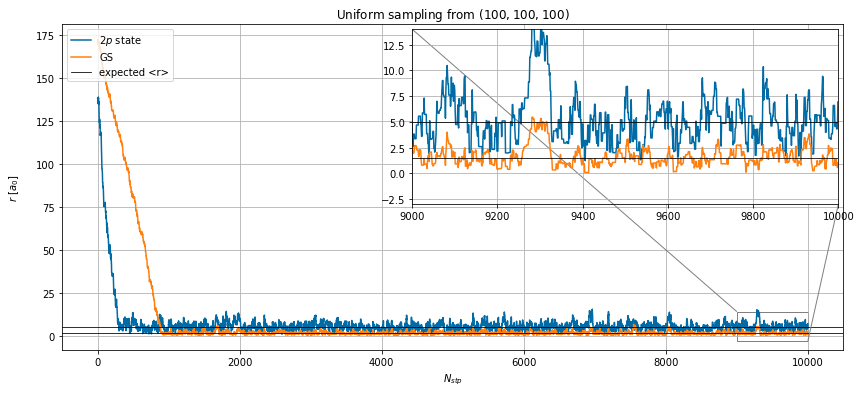

In [9]:
burnGS=np.genfromtxt('radius100far.dat',names='x,r')
burn210=np.genfromtxt('radius210far.dat',names='x,r')

fig, ax=plt.subplots(figsize=(14, 6))

plt.plot(burn210['x'],burn210['r'],label='$2p$ state')
plt.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
plt.legend(loc='best')
plt.xlabel('$N_{stp}$')
plt.ylabel('$r\ [a_0]$',labelpad=15)
plt.title('Uniform sampling from $(100,100,100)$', size='large')
plt.legend(loc='upper left')
plt.grid(True)

axins = zoomed_inset_axes(ax, 6)
axins.plot(burn210['x'],burn210['r'],label='$2p$ state')
axins.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
axins.set_xlim(9000,10000)
axins.set_ylim(-3, 14)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(True)
plt.show()


### Far away from the origin

In this case some equilibration runs would be needed: in the first sampled positions we can see a definite time dependence, where for every step the walker gets nearer and nearer to the origin. Once near the origin the behavior gets more erratic and the walker stays near the origin for the rest of the simulation. We have reached the stable configuration, and we are now sampling the correct distribution.